# Exploratory Data Analysis


In [ ]:
import os
# os.chdir('/content/drive/My Drive/twitter-bot-detection')

In [ ]:
#Import libraries and processed data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
user_df = pd.read_csv("data/final_users.csv",index_col='User ID')
bot_df = pd.read_csv("data/final_bots.csv",index_col='User ID')

bot_df['bot']=1
user_df['bot']=0

total_df = bot_df.append(user_df)

train_data, test_data = train_test_split(total_df, test_size = 0.2, random_state=47)

Y_train=train_data['bot']
Y_test=test_data['bot']
X_train=train_data.drop('bot',axis=1)
X_test=test_data.drop('bot',axis=1)

def normalize(df,df_train):
    result = df.copy()
    for feature_name in df_train.columns:
        max_value = df_train[feature_name].max()
        min_value = df_train[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_train_scaled=normalize(X_train,X_train)

**User feature statisitcs** 

Some of the features are easy to differ, such as number of friends, number of followers, number of favorites and number of tweets . It indicates that these features might play an important role in the bot detection

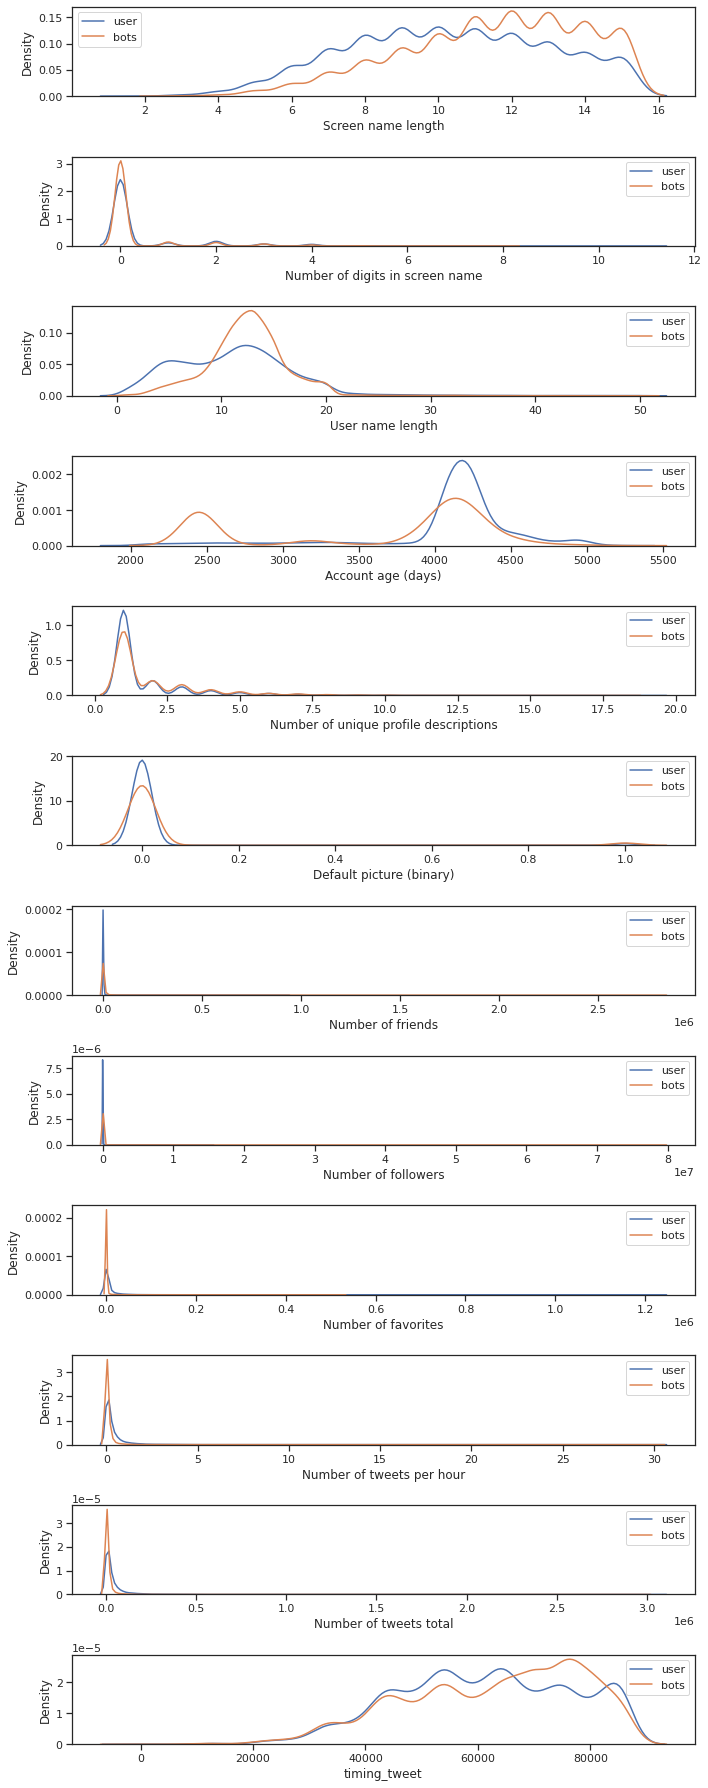

In [ ]:
# Lets's estimate probability of features using Kernel Density Estimate (kde plots)
features = ['Screen name length', 'Number of digits in screen name', 'User name length', 'Account age (days)', 'Number of unique profile descriptions','Default picture (binary)','Number of friends','Number of followers','Number of favorites','Number of tweets per hour', 'Number of tweets total','timing_tweet']
fig, axes = plt.subplots(len(features),1, figsize = (10,25))
for i in range(len(features)):
    sns.kdeplot(user_df[features[i]], ax = axes[i], label = 'user')
    sns.kdeplot(bot_df[features[i]], ax = axes[i], label = 'bots')
    axes[i].set_xlabel(features[i])
    axes[i].legend()

plt.tight_layout()
plt.show()

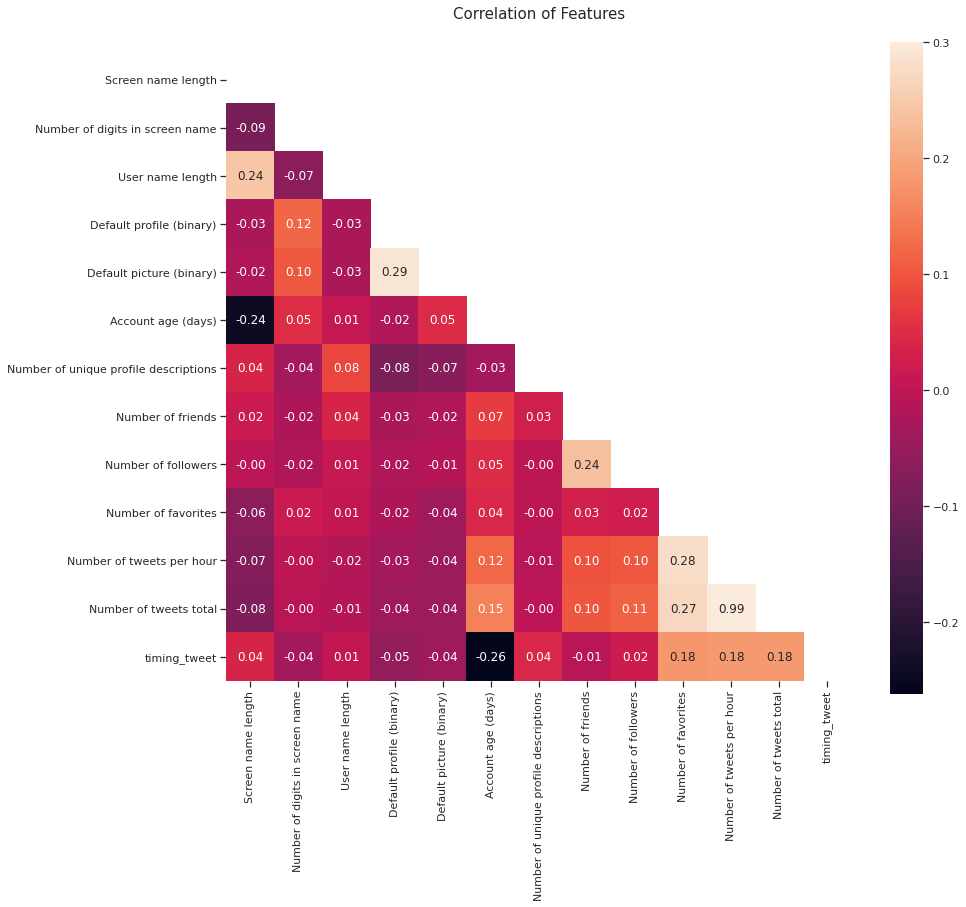

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)

# Generate a mask for the upper triangle
corr = X_train_scaled.astype(float).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", vmax=.3, square=True)

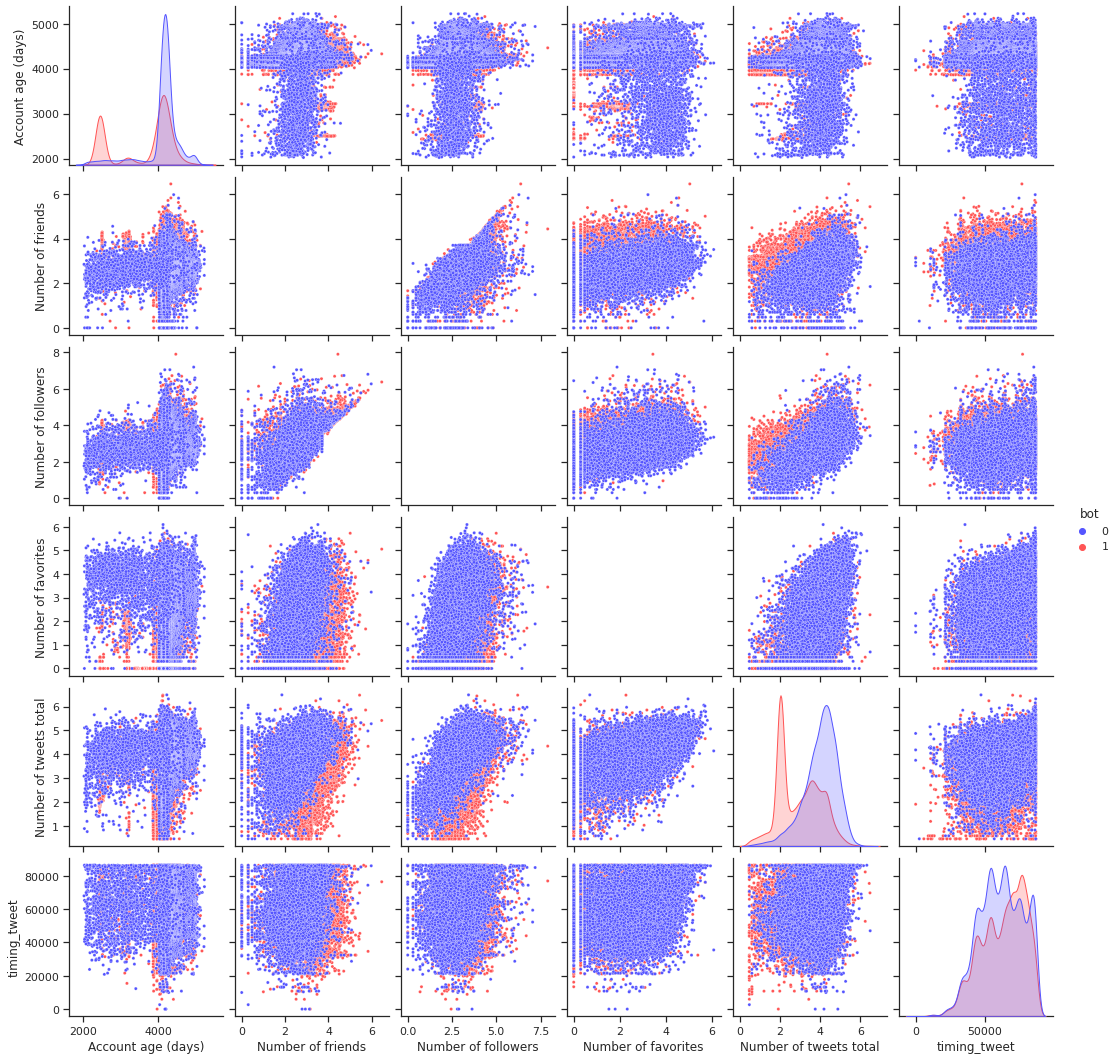

In [ ]:
pairplot_df = total_df.copy()
pairplot_df['Number of friends'] = np.log10(pairplot_df['Number of friends'])
pairplot_df['Number of followers'] = np.log10(pairplot_df['Number of followers'])
pairplot_df['Number of favorites'] = np.log10(pairplot_df['Number of favorites'])
pairplot_df['Number of tweets total'] = np.log10(pairplot_df['Number of tweets total'])

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(pairplot_df, vars=[u'Account age (days)', 'Number of friends', u'Number of followers', u'Number of favorites', u'Number of tweets total', u'timing_tweet'],
                 hue='bot', palette = 'seismic',diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))